# <font color = 'orange'> Group 7 - Yash Gupta, Sahana Kumar, Arunabh Choudhury, Purvi Panchal, Rachel Dercaks </font>

# Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.
Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not.

Our Dataset has following variables:

1. **Gender**	        Male/Female
2. **age**             Age of the person
3. **education**       1 indicates High School, 2 indicates- Secondary School,3 indicates Graduation, 4 indicates Post Graduation
4. **currentSmoker**	1 Indicates person is a smoker and 0 indicates non- smoker
5. **cigsPerDay**    	Number of cigrattes consumed in a day
6. **BP Meds**	        1 indidates person is consuming BP medicines and 0 indicates person is not consuming BP medicines
7. **prevalentStroke**	1 indidates person had stroke in the past and 0 indicates person did not suffered from stroke in the past
8. **prevalentHyp**	1 indidates person is suffering from Hypertension  and 0 indicates person is not suffering from hypertension
9. **diabetes**	    1 indicates person is diabatic and 0 indicates person in non-diabetic
10. **tot cholesterol**	Indicates total cholesterol level in the body
11. **Systolic BP**	    Systolic BP of the person
12. **Diastolic BP**	Diastolic BP of the person
13. **BMI**	Indicates   BMI level in the body
14. **heartRate**	    Indicates body heartrate
15. **glucose**	        Glucose level of the body
16. **Heart-Att**	    1 Indicates  person suffered from Heart-attack and 0 indicates that person will not suffer from Heart-at


## Import Essential Libraries

In [557]:
import numpy as np   
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Read the dataset

In [558]:
df = pd.read_csv("US_Heart_Patients.csv")

In [559]:
df.head(20)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Dataset Summary

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [561]:
print(f'number of rows: {df.shape[0]}'); print(f'number of columns: {df.shape[1]}')

number of rows: 4240
number of columns: 16


In [562]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Data Cleaning

## Renaming Columns for Clarity

In [563]:
df.rename(columns = {'prevalentHyp':'prevalentHypertension',"BP Meds": "BPMeds","tot cholesterol": "total_cholesterol","Systolic BP":"SystolicBP","Diastolic BP":"DiastolicBP", 'Heart-Att':"HeartAttack"},inplace=True)

## Converting Columns to proper Datatype

In [564]:
df = df.astype({'HeartAttack':'category','education': 'category', 'currentSmoker': 'category', 'BPMeds': 'category', 'prevalentHypertension': 'category','prevalentStroke':'category','diabetes':'category','Gender':'category'})

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 4232 non-null   category
 1   age                    4238 non-null   float64 
 2   education              4130 non-null   category
 3   currentSmoker          4237 non-null   category
 4   cigsPerDay             4209 non-null   float64 
 5   BPMeds                 4180 non-null   category
 6   prevalentStroke        4231 non-null   category
 7   prevalentHypertension  4238 non-null   category
 8   diabetes               4238 non-null   category
 9   total_cholesterol      4180 non-null   float64 
 10  SystolicBP             4236 non-null   float64 
 11  DiastolicBP            4235 non-null   float64 
 12  BMI                    4216 non-null   float64 
 13  heartRate              4236 non-null   float64 
 14  glucose                3849 non-null   f

## Checking and Handling Duplicate Rows

In [566]:
df.duplicated().sum()

0

## Checking and Handling Outliers

<AxesSubplot:>

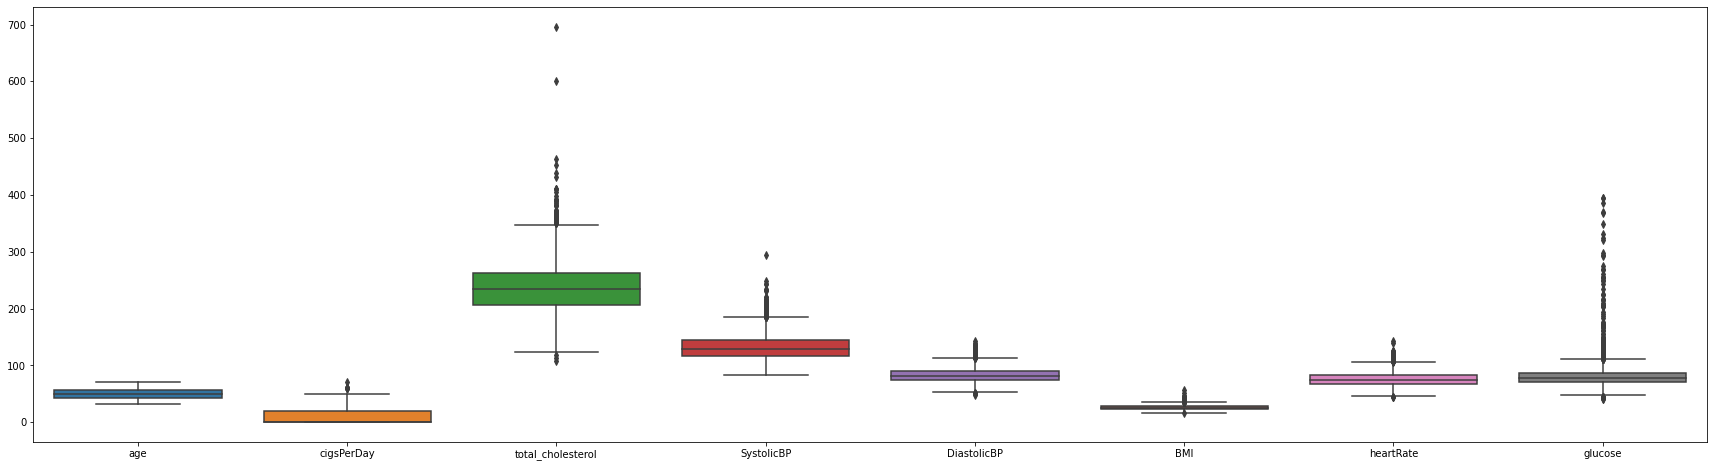

In [567]:
num_df = df.select_dtypes(include=['float64'])
plt.figure(figsize=(30, 8))
sns.boxplot(data=num_df)

As there are many outliers present, we cannot delete those rows as to not lose information. We have chosen to imput the outliers with median as median is resistant to outliers.

# Define the non-numerical columns
non_num_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Create a DataFrame with only numerical variables
num_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the median of each column
median = num_df.median()

# Calculate the interquartile range (IQR) of each column
q1 = num_df.quantile(0.25)
q3 = num_df.quantile(0.75)
q10 = num_df.quantile(0.10)
q90 = num_df.quantile(0.90)
iqr = q3 - q1

# Define the threshold for outliers
threshold = 1.5

# Remove outliers by replacing them with the median of the respective column
for col in num_df.columns:
    mask = num_df[col] > q3[col] + threshold*(q3[col] - q1[col])
    num_df.loc[mask, col] = q90[col]

# Replace lower lying outliers with the 10th percentile of the respective column
for col in num_df.columns:
    mask = num_df[col] < q1[col] - threshold*(q3[col] - q1[col])
    num_df.loc[mask, col] = q10[col]
# Create a new DataFrame with cleaned numerical variables and non-numerical variables
cleaned_df = pd.concat([num_df, df[non_num_cols]], axis=1)

# Replace the original DataFrame with the cleaned one
df = cleaned_df

num_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(30, 8))
sns.boxplot(data=num_df)

In [568]:
df.head(20)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHypertension,diabetes,total_cholesterol,SystolicBP,DiastolicBP,BMI,heartRate,glucose,HeartAttack
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


As you can see the outliers have been imputed.

## Checking and Handling Missing Values

In [569]:
df.isna().sum()

Gender                     8
age                        2
education                110
currentSmoker              3
cigsPerDay                31
BPMeds                    60
prevalentStroke            9
prevalentHypertension      2
diabetes                   2
total_cholesterol         60
SystolicBP                 4
DiastolicBP                5
BMI                       24
heartRate                  4
glucose                  391
HeartAttack                0
dtype: int64

In [570]:
# Calculate percentage of missing values for each column
missing_perc = df.isna().mean() * 100

# Print results
print(missing_perc)

Gender                   0.188679
age                      0.047170
education                2.594340
currentSmoker            0.070755
cigsPerDay               0.731132
BPMeds                   1.415094
prevalentStroke          0.212264
prevalentHypertension    0.047170
diabetes                 0.047170
total_cholesterol        1.415094
SystolicBP               0.094340
DiastolicBP              0.117925
BMI                      0.566038
heartRate                0.094340
glucose                  9.221698
HeartAttack              0.000000
dtype: float64


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 4232 non-null   category
 1   age                    4238 non-null   float64 
 2   education              4130 non-null   category
 3   currentSmoker          4237 non-null   category
 4   cigsPerDay             4209 non-null   float64 
 5   BPMeds                 4180 non-null   category
 6   prevalentStroke        4231 non-null   category
 7   prevalentHypertension  4238 non-null   category
 8   diabetes               4238 non-null   category
 9   total_cholesterol      4180 non-null   float64 
 10  SystolicBP             4236 non-null   float64 
 11  DiastolicBP            4235 non-null   float64 
 12  BMI                    4216 non-null   float64 
 13  heartRate              4236 non-null   float64 
 14  glucose                3849 non-null   f

<font color = 'red'> As the number of missing values is random for different columns, we have decided to impute values using median/mean(for numerical variables) & mode(for categorical variables) so we don't lose any information. </font>

In [572]:
# Impute missing values of numerical variables with median
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df = num_df.fillna(num_df.median())

# Impute missing values of categorical variables with mode
cat_df = df.select_dtypes(include=['category'])
cat_df = cat_df.fillna(cat_df.mode().iloc[0])

clean_df = pd.concat([num_df, cat_df], axis=1)

# Replace the original variables with the cleaned ones
df = clean_df

In [573]:
df.isna().sum()

age                      0
cigsPerDay               0
total_cholesterol        0
SystolicBP               0
DiastolicBP              0
BMI                      0
heartRate                0
glucose                  0
Gender                   0
education                0
currentSmoker            0
BPMeds                   0
prevalentStroke          0
prevalentHypertension    0
diabetes                 0
HeartAttack              0
dtype: int64

<font color = 'red'> As you can see, the missing values have been imputed and no further are present.</font>

## Confirming if we need SMOTE by checking for class imbalance ratio

Generally, SMOTE is used when the minority class is significantly smaller than the majority class, such as when the minority class makes up less than 10% of the total dataset. 

In [574]:
df['HeartAttack'].value_counts()

0    3596
1     644
Name: HeartAttack, dtype: int64

<AxesSubplot:xlabel='HeartAttack', ylabel='count'>

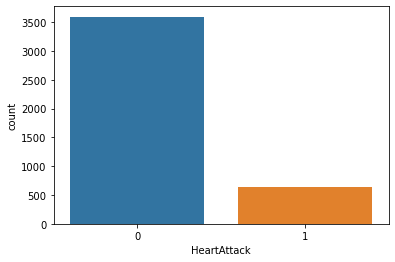

In [575]:
sns.countplot(df['HeartAttack'])

In [576]:
644/3596

0.17908787541713014

<font color = 'red'> As we can see, the minority class is around 18% of majority class, we don't need to use SMOTE.
However we will apply SMOTE to balance the target variable more and use stratification during test train split to maintain the same class balance in train and test datasets </font>

# Correlation Analysis

<AxesSubplot:>

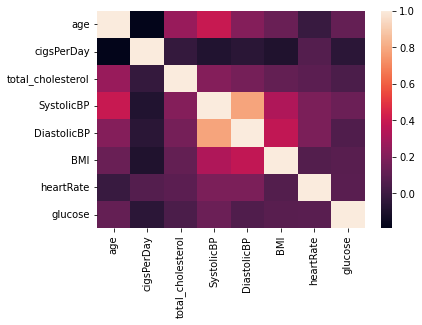

In [577]:
sns.heatmap(df.corr())

In [578]:
df.corr()

,age,cigsPerDay,total_cholesterol,SystolicBP,DiastolicBP,BMI,heartRate,glucose
age,1.000000,-0.191279,0.260522,0.394080,0.205334,0.134302,-0.011342,0.117108
cigsPerDay,-0.191279,1.000000,-0.026874,-0.088819,-0.057214,-0.092723,0.072906,-0.056206
total_cholesterol,0.260522,-0.026874,1.000000,0.207234,0.162610,0.114801,0.090748,0.045698
SystolicBP,0.394080,-0.088819,0.207234,1.000000,0.783860,0.324609,0.183298,0.134726
DiastolicBP,0.205334,-0.057214,0.162610,0.783860,1.000000,0.375706,0.181580,0.058229
BMI,0.134302,-0.092723,0.114801,0.324609,0.375706,1.000000,0.068135,0.081519
heartRate,-0.011342,0.072906,0.090748,0.183298,0.181580,0.068135,1.000000,0.086941
glucose,0.117108,-0.056206,0.045698,0.134726,0.058229,0.081519,0.086941,1.000000


<font color = 'red'> As DiastolicBP and SystolicBP have high linear positive correlation, we might decide to drop either variable. We will decide further after mutual information and multivariate analysis to decide which to drop. </font>

# Uni and Multivariate Analysis

<AxesSubplot:xlabel='HeartAttack', ylabel='age'>

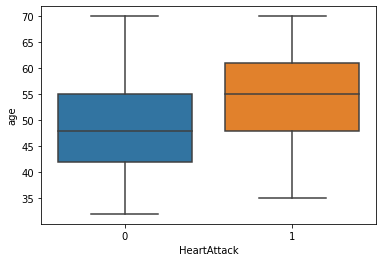

In [579]:
sns.boxplot(df["HeartAttack"],df['age'])

The median age of people getting heart attacks is slightly higher than those who don't.

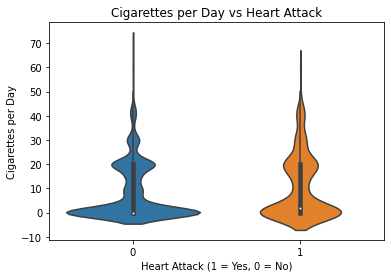

In [580]:
# Create scatter plot with jittering
sns.violinplot(x='HeartAttack', y='cigsPerDay', data=df, jitter=True)

# Set plot title and axis labels
plt.title('Cigarettes per Day vs Heart Attack')
plt.xlabel('Heart Attack (1 = Yes, 0 = No)')
plt.ylabel('Cigarettes per Day')

# Show the plot
plt.show()

Smoking more cigerattes per day leads to higher chances of heart attack but the relation is not that strong.

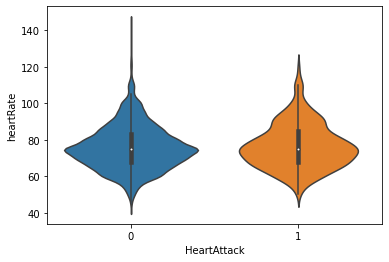

In [581]:
sns.violinplot(df["HeartAttack"], df['heartRate'], jitter=True) 
plt.show()

Higher the heartrate, more chances of having heart attack but the relation is not that strong.

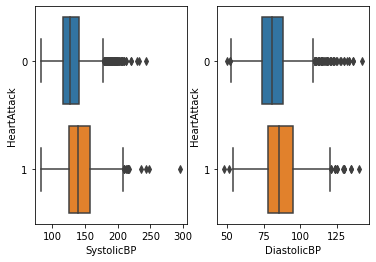

In [582]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Create a count plot on the first subplot
sns.boxplot(df["SystolicBP"],df['HeartAttack'], ax=axes[0])

# Create a scatterplot on the second subplot
sns.boxplot(df["DiastolicBP"],df['HeartAttack'], ax=axes[1])

# Show the plot
plt.show()

 Higher the D/S BP, more prone to having Heart Attacks.

In [583]:
df.drop(['SystolicBP'], axis = 1,inplace=True)

<AxesSubplot:xlabel='HeartAttack', ylabel='BMI'>

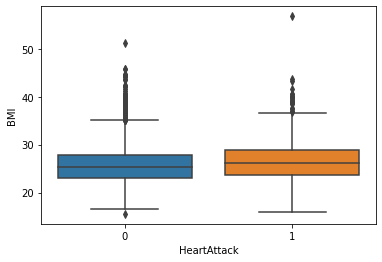

In [584]:
sns.boxplot(df["HeartAttack"],df['BMI'])

We cannot correlate HeartAttacks with BMI of a person

<AxesSubplot:xlabel='HeartAttack', ylabel='glucose'>

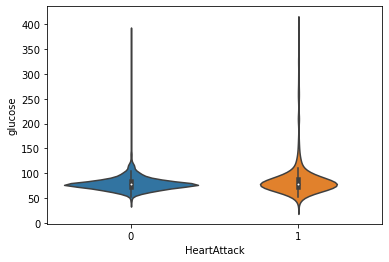

In [585]:
sns.violinplot(df["HeartAttack"],df['glucose'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

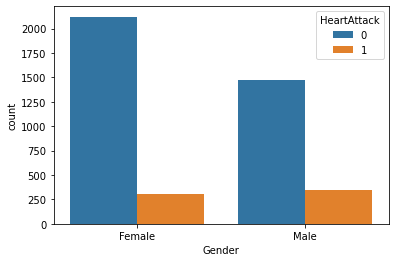

In [586]:
sns.countplot(df['Gender'], hue = df['HeartAttack'])

<AxesSubplot:xlabel='HeartAttack', ylabel='total_cholesterol'>

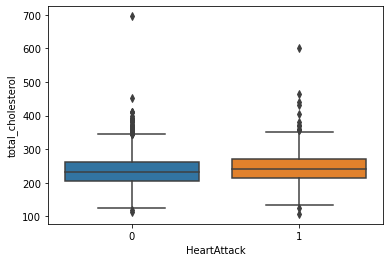

In [587]:
sns.boxplot(df["HeartAttack"],df['total_cholesterol'])

# Standard Scaling of the Data 

In [588]:
num1 = ['age','cigsPerDay','total_cholesterol','DiastolicBP','BMI','heartRate','glucose']

scaler = StandardScaler()
df[num1] = scaler.fit_transform(df[num1])

# One Hot Encoding of Categorical Variables

In [589]:
df['HeartAttack'] = df['HeartAttack'].astype('int64')

In [590]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="category":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHypertension', 'diabetes']
['age', 'cigsPerDay', 'total_cholesterol', 'DiastolicBP', 'BMI', 'heartRate', 'glucose', 'HeartAttack']


In [591]:
df= pd.get_dummies(df, columns=cat,drop_first=True)

df.head(20)

,age,cigsPerDay,total_cholesterol,DiastolicBP,BMI,heartRate,glucose,HeartAttack,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHypertension_1.0,diabetes_1.0
0,-1.234445,-0.750906,-0.940044,-1.083550,0.288770,0.344635,-0.200742,0,1,0,0,1,0,0,0,0,0
1,-0.417628,-0.750906,0.301627,-0.159652,0.721912,1.595423,-0.244501,0,0,1,0,0,0,0,0,0,0
2,-0.184252,0.929709,0.188748,-0.243642,-0.112378,-0.072294,-0.507052,0,1,0,0,0,1,0,0,0,0
3,1.332694,1.770016,-0.262769,1.016219,0.684996,-0.906153,0.936980,1,0,0,1,0,1,0,0,1,0
4,-0.417628,1.181801,1.091782,0.092320,-0.663649,0.761565,0.149326,0,0,0,1,0,1,0,0,0,0
5,-0.767692,-0.750906,-0.195041,2.276080,1.108294,0.094478,0.761946,0,0,1,0,0,0,0,0,1,0
6,1.566071,-0.750906,-0.714286,-0.999559,1.799843,-1.323082,0.149326,1,0,0,0,0,0,0,0,0,0
7,-0.534316,0.929709,1.723906,-0.999559,-1.013115,0.261249,-0.156984,0,0,1,0,0,1,0,0,0,0
8,0.282501,-0.750906,0.527386,0.512274,0.138647,0.011092,-0.113225,0,1,0,0,0,0,0,0,1,0
9,-0.767692,1.770016,-0.262769,2.024107,-0.538136,1.428652,0.280602,0,1,0,0,0,1,0,0,1,0


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4240 non-null   float64
 1   cigsPerDay                 4240 non-null   float64
 2   total_cholesterol          4240 non-null   float64
 3   DiastolicBP                4240 non-null   float64
 4   BMI                        4240 non-null   float64
 5   heartRate                  4240 non-null   float64
 6   glucose                    4240 non-null   float64
 7   HeartAttack                4240 non-null   int64  
 8   Gender_Male                4240 non-null   uint8  
 9   education_2.0              4240 non-null   uint8  
 10  education_3.0              4240 non-null   uint8  
 11  education_4.0              4240 non-null   uint8  
 12  currentSmoker_1.0          4240 non-null   uint8  
 13  BPMeds_1.0                 4240 non-null   uint8

# SMOTE

In [593]:
# Copy all the predictor variables into X dataframe
X = df.drop('HeartAttack', axis=1)

# Copy target into the y dataframe.  
y = df['HeartAttack']

In [594]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [595]:
df_smote = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df_smote.columns = df.columns
df = df_smote

In [596]:
df['HeartAttack'].value_counts()

0    3967
1    3225
Name: HeartAttack, dtype: int64

<font color ='red'> The class imbalance issue has been solved </font>

# Mutual Information

In [597]:
mi_scores = mutual_info_classif(X, y)

In [598]:
for i, col in enumerate(X.columns):
    print("Mutual information score for {} is {:.2f}".format(col, mi_scores[i]))

Mutual information score for age is 0.02
Mutual information score for cigsPerDay is 0.01
Mutual information score for total_cholesterol is 0.01
Mutual information score for DiastolicBP is 0.02
Mutual information score for BMI is 0.01
Mutual information score for heartRate is 0.00
Mutual information score for glucose is 0.00
Mutual information score for Gender_Male is 0.00
Mutual information score for education_2.0 is 0.00
Mutual information score for education_3.0 is 0.00
Mutual information score for education_4.0 is 0.00
Mutual information score for currentSmoker_1.0 is 0.00
Mutual information score for BPMeds_1.0 is 0.00
Mutual information score for prevalentStroke_1.0 is 0.00
Mutual information score for prevalentHypertension_1.0 is 0.02
Mutual information score for diabetes_1.0 is 0.01


Using Mutual Information Classification does not give very substantial information on which variables are the most important for the target variable's prediction, hence we will use all the variables.

# Train Test Split with Stratification

Stratification of the target variable in the train-test split is important because it helps to ensure that the distribution of the target variable is similar in both the training and testing datasets. This is important because if the target variable is not distributed similarly in both datasets, then the model may not generalize well to new, unseen data.

Stratification involves dividing the data into homogeneous subgroups based on the target variable. For example, if the target variable is a binary classification variable (e.g. 0 or 1), stratification involves dividing the data into two subgroups such that the proportion of 0's and 1's is similar in both the training and testing datasets.

By doing so, we ensure that the model is trained on a representative sample of the data, and that it is able to generalize well to new, unseen data. Without stratification, the model may be biased towards certain values of the target variable, leading to poor generalization performance.

In [599]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartAttack', axis=1), 
                                                    df['HeartAttack'], 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=df['HeartAttack'])

In [600]:
y_test.value_counts()[1]/y_test.value_counts()[0]

0.8125

In [601]:
y_train.value_counts()[1]/y_train.value_counts()[0]

0.813109243697479

# Fitting Various Classification Models

In [602]:
models = [KNeighborsClassifier(), LogisticRegression(), tree.DecisionTreeClassifier(), SVC(), GaussianNB(),RandomForestClassifier()]

In [614]:
# Define the hyperparameters to tune for each model
knn_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

logreg_hyperparameters = {
    'C': [0.01, 0.1, 1, 10, 100]
}

dt_hyperparameters = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svc_hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

nb_hyperparameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
rf_hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the models to use
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB()
]

# Train and evaluate each model
results_df = pd.DataFrame(columns=['model name', 'Class 1 Recall'])
for model in models:
    
    print(f"Model: {type(model).__name__}")
    
    # Define the hyperparameters to use for the model
    if isinstance(model, KNeighborsClassifier):
        hyperparameters = knn_hyperparameters
    elif isinstance(model, LogisticRegression):
        hyperparameters = logreg_hyperparameters
    elif isinstance(model, DecisionTreeClassifier):
        hyperparameters = dt_hyperparameters
    elif isinstance(model, SVC):
        hyperparameters = svc_hyperparameters
    elif isinstance(model, GaussianNB):
        hyperparameters = nb_hyperparameters
    elif isinstance(model, RandomForestClassifier):
        hyperparameters = rf_hyperparameters
    
    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model, hyperparameters, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters and the corresponding performance
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
    
    # Train the model with the best hyperparameters on the full training set
    model.set_params(**grid_search.best_params_)
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    
    # Print the model coefficients for linear models
    if isinstance(model, LogisticRegression):
        print(f"Model Coefficients: {model.coef_}")
        
    # Print the feature importance for tree-based models
    if isinstance(model, (DecisionTreeClassifier)):
        feature_importances = pd.DataFrame(model.feature_importances_,
                                            index = X_train.columns,
                                            columns=['importance']).sort_values('importance', ascending=False)
        print(f"Feature Importance:\n{feature_importances}")
    
    results_df = results_df.append({'model name': type(model).__name__,
                                    'Class 1 Recall': classification_report(y_test, y_pred, output_dict=True)['1']['recall']},
                                    ignore_index=True)

Model: KNeighborsClassifier
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.7840195948629682
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       992
           1       0.80      0.75      0.77       806

    accuracy                           0.80      1798
   macro avg       0.80      0.80      0.80      1798
weighted avg       0.80      0.80      0.80      1798

Accuracy Score: 0.8025583982202447
Model: LogisticRegression
Best Hyperparameters: {'C': 0.1}
Best Score: 0.6983685849434558
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       992
           1       0.68      0.59      0.63       806

    accuracy                           0.69      1798
   macro avg       0.69      0.68      0.69      1798
weighted avg       0.69      0.69      0.69      1798

Accuracy Score: 0.69410456062

In [615]:
results_dfs_df

,model name,Class 1 Recall
0,KNeighborsClassifier,0.746898
1,LogisticRegression,0.58933
2,DecisionTreeClassifier,0.667494
3,SVC,0.71464
4,GaussianNB,0.636476


# Dimensionality Reduction Using PCA

In [604]:
# Perform PCA
pca = PCA()
pca.fit(X)

# Get explained variance ratio
var_ratio = pca.explained_variance_ratio_

# Get cumulative sum of explained variance ratio
cum_var_ratio = np.cumsum(var_ratio)

# Get index of first element that exceeds 0.9 (90%)
n_components = np.argmax(cum_var_ratio > 0.9) + 1

# Get most important variables
important_vars = pca.components_[:n_components, :]

# Get names of most important variables
var_names = X.columns
important_var_names = [var_names[i] for i in range(n_components)]

# Print results
print(f"The most important variables are: {important_var_names}")
print(f"They cover {cum_var_ratio[n_components-1]*100:.2f}% of the total variance.")

The most important variables are: ['age', 'cigsPerDay', 'total_cholesterol', 'DiastolicBP', 'BMI', 'heartRate', 'glucose', 'Gender_Male']
They cover 92.05% of the total variance.


In [605]:
X_pca = X[['age', 'cigsPerDay', 'total_cholesterol', 'DiastolicBP', 'BMI', 'heartRate', 'glucose', 'Gender_Male', 'education_2.0']]

In [606]:
X_pca

,age,cigsPerDay,total_cholesterol,DiastolicBP,BMI,heartRate,glucose,Gender_Male,education_2.0
0,-1.234445,-0.750906,-0.940044,-1.083550,0.288770,0.344635,-0.200742,1,0
1,-0.417628,-0.750906,0.301627,-0.159652,0.721912,1.595423,-0.244501,0,1
2,-0.184252,0.929709,0.188748,-0.243642,-0.112378,-0.072294,-0.507052,1,0
3,1.332694,1.770016,-0.262769,1.016219,0.684996,-0.906153,0.936980,0,0
4,-0.417628,1.181801,1.091782,0.092320,-0.663649,0.761565,0.149326,0,0
...,...,...,...,...,...,...,...,...,...
4235,-0.184252,0.929709,0.256475,-0.915568,-0.934362,0.678179,0.193085,0,1
4236,-0.651004,0.509555,-0.601407,0.344293,-1.633295,0.844951,-0.156984,0,0
4237,0.282501,-0.750906,0.730568,0.008330,-1.064797,0.344635,1.112014,0,1
4238,-1.117757,-0.750906,-1.165803,1.268191,-0.048391,-0.739381,-0.419535,1,0


In [607]:
y_pca = y

In [608]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.25, random_state=42)

# Fitting Models on PCA Data

In [609]:
# Define the hyperparameters to tune for each model
knn_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

logreg_hyperparameters = {
    'C': [0.01, 0.1, 1, 10, 100]
}

dt_hyperparameters = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svc_hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

nb_hyperparameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
rf_hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the models to use
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB()
]

# Train and evaluate each model
for model in models:
    print(f"Model: {type(model).__name__}")
    
    # Define the hyperparameters to use for the model
    if isinstance(model, KNeighborsClassifier):
        hyperparameters = knn_hyperparameters
    elif isinstance(model, LogisticRegression):
        hyperparameters = logreg_hyperparameters
    elif isinstance(model, DecisionTreeClassifier):
        hyperparameters = dt_hyperparameters
    elif isinstance(model, SVC):
        hyperparameters = svc_hyperparameters
    elif isinstance(model, GaussianNB):
        hyperparameters = nb_hyperparameters
    elif isinstance(model, RandomForestClassifier):
        hyperparameters = rf_hyperparameters
    
    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model, hyperparameters, cv=5)
    grid_search.fit(X_pca_train, y_pca_train)
    
    # Print the best hyperparameters and the corresponding performance
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
    
    # Train the model with the best hyperparameters on the full training set
    model.set_params(**grid_search.best_params_)
    model.fit(X_pca_train, y_pca_train)
    
    # Evaluate the model on the test set
    y_pca_pred = model.predict(X_pca_test)
    print(f"Classification Report:\n{classification_report(y_pca_test, y_pca_pred)}")
    print(f"Accuracy Score: {accuracy_score(y_pca_test, y_pca_pred)}")
    
    # Print the model coefficients for linear models
    if isinstance(model, LogisticRegression):
        print(f"Model Coefficients: {model.coef_}")
        
    # Print the feature importance for tree-based models
    if isinstance(model, (DecisionTreeClassifier)):
        feature_importances = pd.DataFrame(model.feature_importances_,
                                            index = X_pca_train.columns,
                                            columns=['importance']).sort_values('importance', ascending=False)
        print(f"Feature Importance:\n{feature_importances}")
    


Model: KNeighborsClassifier
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score: 0.8459119496855345
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       905
           1       0.32      0.04      0.07       155

    accuracy                           0.85      1060
   macro avg       0.59      0.51      0.49      1060
weighted avg       0.78      0.85      0.79      1060

Accuracy Score: 0.8471698113207548
Model: LogisticRegression
Best Hyperparameters: {'C': 1}
Best Score: 0.85062893081761
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       905
           1       0.55      0.04      0.07       155

    accuracy                           0.85      1060
   macro avg       0.70      0.52      0.50      1060
weighted avg       0.81      0.85      0.80      1060

Accuracy Score: 0.854716981132075

After applying PCA, the model scores are increasing but the Recall for Class-1 (Heart Attack - 1) is decreasing substantially,hence PCA is not a good method for this problem statement.

## <font color = 'Purple'> Best Model Selection Criteria </font>

### Interest Class is 1 i.e. HeartAttack = 1

### Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

In [616]:
results_df

,model name,Class 1 Recall
0,KNeighborsClassifier,0.746898
1,LogisticRegression,0.58933
2,DecisionTreeClassifier,0.667494
3,SVC,0.71464
4,GaussianNB,0.636476


<font color = 'purple'> Hence, the Best Performing Model for our problem is KNN </font>

# <center> <font color = 'red'> Thank You </font>